## Projeto 2: Classificando tipos acidentes

##### descrição

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
main_df = pd.read_csv('acidentes_group.csv', index_col=0)

In [3]:
# número de ocorrência das classes
main_df['tipo'].value_counts()

COLISÃO              16699
ABALROAMENTO          8224
CHOQUE                1217
ATROPELAMENTO          633
ENGAVETAMENTO          227
ACID. DE PERCURSO      104
TOMBAMENTO              89
CAPOTAMENTO             55
Name: tipo, dtype: int64

### Ajustes na discrepancia de ocorrência das classes

In [88]:
df_colisao = main_df[main_df['tipo'] == 'COLISÃO']
df_colisao = df_colisao.reset_index(drop=True)
df_colisao.drop(df_colisao.loc[:1000].index, inplace=True)
df_colisao.shape

(15698, 16)

In [89]:
main_df = main_df[main_df['tipo'] != 'COLISÃO']
main_df.reset_index(drop=True)
main_df.head(2)

,data,natureza_acidente,bairro,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,mao_direcao
1,2020-01-01,SEM VÍTIMA,CORDEIRO,ABALROAMENTO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Dupla
2,2020-01-01,SEM VÍTIMA,AREIAS,CHOQUE,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Dupla


In [90]:
main_df = pd.concat([main_df, df_colisao], ignore_index=True)
main_df.shape

(26247, 16)

In [4]:
main_df['tipo'].value_counts()

COLISÃO              16699
ABALROAMENTO          8224
CHOQUE                1217
ATROPELAMENTO          633
ENGAVETAMENTO          227
ACID. DE PERCURSO      104
TOMBAMENTO              89
CAPOTAMENTO             55
Name: tipo, dtype: int64

In [92]:
def renameTypes(x):
    if x in ['ENGAVETAMENTO', 'ACID. DE PERCURSO', 'TOMBAMENTO', 'CAPOTAMENTO', 'ATROPELAMENTO']:
        return 'OUTROS'
    else:
        return x

In [93]:
main_df['tipo'] = main_df['tipo'].apply(renameTypes)
main_df['tipo'].value_counts()

COLISÃO         15698
ABALROAMENTO     8224
CHOQUE           1217
OUTROS           1108
Name: tipo, dtype: int64

In [5]:
main_df['bairro'] = main_df['bairro'].astype('category')
main_df['bairro'] = main_df['bairro'].cat.codes
#main_df['mao_direcao'] = main_df['mao_direcao'].astype('category')
#main_df['mao_direcao'] = main_df['mao_direcao'].cat.codes
main_df['natureza_acidente'] = main_df['natureza_acidente'].astype('category')
main_df['natureza_acidente'] = main_df['natureza_acidente'].cat.codes
main_df['tipo'] = main_df['tipo'].astype('category')
# main_df['data'] = pd.to_numeric((pd.to_datetime(main_df['data'], format='%Y-%m-%d')))
main_df.head()

,data,natureza_acidente,bairro,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,mao_direcao
0,2020-01-01,1,94,COLISÃO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Única
1,2020-01-01,1,32,ABALROAMENTO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Dupla
2,2020-01-01,1,7,CHOQUE,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Dupla
3,2020-01-01,1,12,COLISÃO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Única
4,2020-01-01,1,68,ABALROAMENTO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Única


In [6]:
dfDummies = pd.get_dummies(main_df['bairro'], prefix = 'bairro')
main_df = pd.concat([main_df, dfDummies], axis=1)
dfDummies2 = pd.get_dummies(main_df['natureza_acidente'], prefix = 'natureza')
main_df = pd.concat([main_df, dfDummies2], axis=1)
#dfDummies3 = pd.get_dummies(main_df['mao_direcao'], prefix = 'mao')
#main_df = pd.concat([main_df, dfDummies3], axis=1)

In [7]:
main_df = main_df.drop(['data', 'mao_direcao'], axis=1)

In [8]:
main_df.isna().sum()

natureza_acidente    0
bairro               0
tipo                 0
auto                 0
moto                 0
                    ..
bairro_93            0
bairro_94            0
natureza_0           0
natureza_1           0
natureza_2           0
Length: 112, dtype: int64

In [9]:
main_df = main_df.sample(frac=1)

In [10]:
X_acidentes = main_df.drop('tipo', axis=1)
y_acidentes = main_df['tipo']

Xtrain, Xtest, ytrain, ytest = train_test_split(X_acidentes, y_acidentes, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(Xtrain, ytrain, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

## Predições

#### KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [30]:
k_range = range(1, 40)

k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_acidentes, y_acidentes, cv=3, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.517690492394683, 0.46062139796042284, 0.532369619030202, 0.5431228203845281, 0.5787946340593716, 0.5521873287632956, 0.5837489725949266, 0.5632339532001518, 0.5801528982567473, 0.5743546334771722, 0.5880066964873255, 0.5831989826157198, 0.5888874950804205, 0.5913829308089097, 0.6000440132603393, 0.5972179790398414, 0.6016218588627659, 0.6004842832511147, 0.6047046014081285, 0.6005576602359755, 0.6056589264958833, 0.6024294057359669, 0.6048148345788428, 0.6047414980020359, 0.6052551328552559, 0.6044112227744576, 0.6073103915314934, 0.6060260619501205, 0.6077508756849539, 0.6057324125824893, 0.6081179222414729, 0.6075308093832575, 0.6077876955035592, 0.6074940582583439, 0.6094390958862831, 0.6078610442027822, 0.6069068686248263, 0.6072738666916808, 0.60753072856715]


Text(0, 0.5, 'Cross-Validated Accuracy')

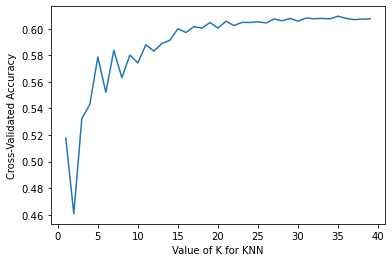

In [31]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [32]:
model = KNeighborsClassifier(n_neighbors=35)

In [33]:
#desempenho no treinamento e teste
y1_model = model.fit(Xtrain, ytrain).predict(Xtrain)
y2_model = model.fit(Xtrain, ytrain).predict(Xtest)
accuracy_score(ytrain, y1_model), accuracy_score(ytest, y2_model)

(0.623956326268465, 0.5926605504587156)

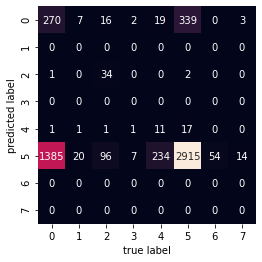

In [34]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y2_model)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [23]:
clf_tree = DecisionTreeClassifier(random_state=0)

In [24]:
clf_tree.fit(Xtrain, ytrain)
tree_pred = clf_tree.predict(Xtest)
tree_pred_train = clf_tree.predict(Xtrain)

In [25]:
print("ACC TRAINING:" + str(accuracy_score(ytrain, tree_pred_train)))
print("ACC TEST:" + str(accuracy_score(ytest, tree_pred)))

ACC TRAINING:0.6936416184971098
ACC TEST:0.6335779816513761


## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

### Selecionando hyperparâmetros sobre o conjunto de validação com RandomizedSearch

In [36]:
random_search_cv = RandomizedSearchCV(estimator = RandomForestClassifier(),
                              param_distributions = {'n_estimators':range(10,2000,200)},cv = 3,n_iter = 10)

random_search_cv.fit(X_val,y_val)

#Vamos ver informações relevantes:
print('Melhor número de estimadores: {}'.format(random_search_cv.best_params_['n_estimators']))
print('Desempenho do melhor modelo: {}'.format(round(random_search_cv.best_score_,3)))

Melhor número de estimadores: 1210
Desempenho do melhor modelo: 0.609


In [37]:
random_search_cv = RandomizedSearchCV(estimator = RandomForestClassifier(n_estimators = random_search_cv.best_params_['n_estimators']),
                              param_distributions = {'max_depth': [5, 8, 15, 25, 30]},cv = 3, n_iter = 5)

random_search_cv.fit(X_val,y_val)

#Vamos ver informações relevantes:
print('Melhor max_depth: {}'.format(random_search_cv.best_params_['max_depth']))
print('Desempenho do melhor modelo: {}'.format(round(random_search_cv.best_score_,3)))

Melhor max_depth: 15
Desempenho do melhor modelo: 0.628


### Treinando o modelo com os valores encontrados para os hyperparâmetros e realizando predição

In [38]:
model = RandomForestClassifier(random_state=0, n_estimators=1210, max_depth=15)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
ypred_train = model.predict(Xtrain)

In [39]:
print("ACC TRAINING:" + str(accuracy_score(ytrain, ypred_train)))
print("ACC TEST:" + str(accuracy_score(ytest, ypred)))

ACC TRAINING:0.6479493531516652
ACC TEST:0.6240366972477064


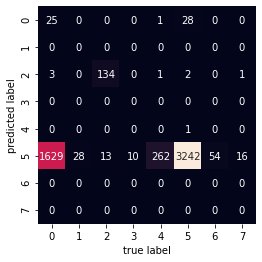

In [40]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

### Selecionando hyperparâmetros sobre o conjunto de validação com RandomizedSearch

In [42]:
from sklearn.model_selection import RandomizedSearchCV

random_search_cv = RandomizedSearchCV(estimator = GradientBoostingClassifier(random_state = 0),
                              param_distributions = {'n_estimators':range(10,100,5)},cv = 3,n_iter = 10)

random_search_cv.fit(X_val,y_val)

#Vamos ver informações relevantes:
print('Melhor número de estimadores: {}'.format(random_search_cv.best_params_['n_estimators']))
print('Desempenho do melhor modelo: {}'.format(round(random_search_cv.best_score_,3)))

Melhor número de estimadores: 25
Desempenho do melhor modelo: 0.619


In [43]:
random_search_cv = RandomizedSearchCV(estimator = GradientBoostingClassifier(random_state = 0, n_estimators=random_search_cv.best_params_['n_estimators']),
                            param_distributions = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)},
                            cv = 3,n_iter = 10)

random_search_cv.fit(X_val,y_val)

#Vamos ver informações relevantes:
print('Max depth: {}'.format(random_search_cv.best_params_['max_depth']))
print('min_samples_split: {}'.format(random_search_cv.best_params_['min_samples_split']))
print('Desempenho do melhor modelo: {}'.format(round(random_search_cv.best_score_,3)))

Max depth: 15
min_samples_split: 400
Desempenho do melhor modelo: 0.624


### Treinando o modelo com os valores encontrados para os hyperparâmetros e realizando predição

In [44]:
modelGB = GradientBoostingClassifier(random_state=0, n_estimators=25, max_depth=15)
modelGB.fit(Xtrain, ytrain)

GradientBoostingClassifier(max_depth=15, n_estimators=25, random_state=0)

In [45]:
ypred = modelGB.predict(Xtest)
ypred_train = modelGB.predict(Xtrain)
print("ACC TRAINING:" + str(accuracy_score(ytrain, ypred_train)))
print("ACC TEST:" + str(accuracy_score(ytest, ypred)))

ACC TRAINING:0.6885035324341683
ACC TEST:0.6352293577981651


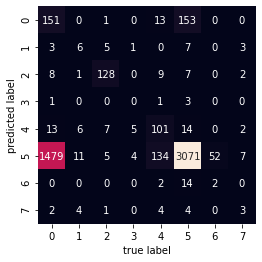

In [46]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# TODO: 
   ### - ADICIONAR O MLFLOW